In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 28s 11ms/step - loss: 0.3805 - val_loss: 0.1920
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1818 - val_loss: 0.1535
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1489 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1312 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1204 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1126 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1070 - val_loss: 0.1027
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1032 - val_loss: 0.0995
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1004 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0981 - val_loss: 0.09

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

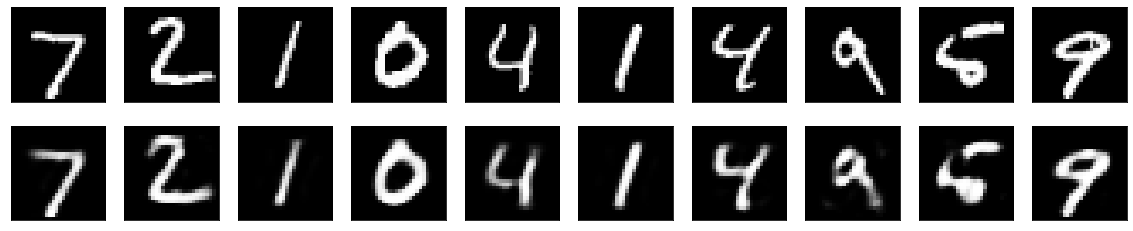

In [9]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Sparse

In [43]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(28,28,))

# Add a Dense layer with a L1 activity regularizer
# flat= layers.Flatten()(input_img)
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(0))(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [44]:
x_test_encoded

array([[   0.     , 2185.284  ,  728.8613 , ..., 1302.8889 , 1795.3848 ,
         831.27765],
       [2827.8718 ,    0.     , 1918.7749 , ..., 1706.1106 , 1341.4391 ,
        3691.468  ],
       [ 442.7534 ,  240.8488 ,  713.16864, ..., 1461.5208 ,  665.93335,
        1900.2374 ],
       ...,
       [1988.8256 , 2316.642  , 1725.8597 , ..., 1482.3558 , 1095.5049 ,
        2562.229  ],
       [   0.     , 2131.2727 ,  523.9657 , ...,  401.48254, 2123.012  ,
        4421.416  ],
       [5038.3975 , 4631.5347 , 3235.943  , ..., 3445.5713 , 1125.5737 ,
        7861.275  ]], dtype=float32)

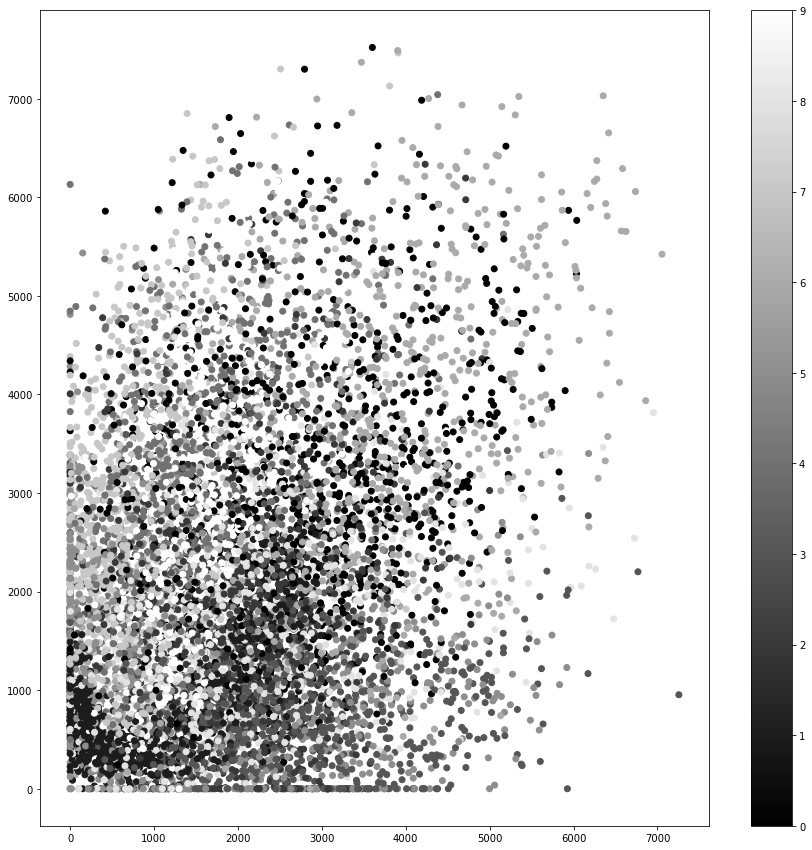

In [45]:
x_test_encoded = encoder.predict(x_test.reshape(-1,784), batch_size=10)
plt.figure(figsize=(15, 15))
plt.scatter(x_test_encoded[ :, 0], x_test_encoded[ :, 1], c=y_test)
plt.colorbar()
plt.show()